In [83]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
train = pd.read_csv(r"C:\Users\dbda\Desktop\Assessment\Loan\train_u6lujuX_CVtuZ9i.csv")
test= pd.read_csv(r"C:\Users\dbda\Desktop\Assessment\Loan\test_Y3wMUE5_7gLdaTN.csv")

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [8]:
full_data=train.append(test, sort=False)
full_data.shape

(981, 13)

In [9]:
full_data["LoanAmount"]=full_data["LoanAmount"].fillna(np.mean(full_data["LoanAmount"]))
full_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y


In [10]:
full_data.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [11]:
full_data["Loan_Amount_Term"]=full_data["Loan_Amount_Term"].fillna(360.0)
full_data.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [12]:
full_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y


In [13]:
full_data[["Education", "Credit_History"]].groupby(["Education"], as_index=True).mean()


,Credit_History
Education,
Graduate,0.849003
Not Graduate,0.790000


# fill na using simple Imputer

In [14]:
cat = SimpleImputer(strategy="most_frequent")
sim = SimpleImputer(missing_values=np.nan, strategy="median")

In [15]:
full_data["Gender"]=cat.fit_transform(full_data[["Gender"]])
full_data["Married"]=cat.fit_transform(full_data[["Married"]])
full_data["Self_Employed"]=cat.fit_transform(full_data[["Self_Employed"]])
full_data["Credit_History"]=sim.fit_transform(full_data[["Credit_History"]])
full_data["Dependents"]=cat.fit_transform(full_data[["Dependents"]])

In [16]:
full_data.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

### correlation

In [17]:
full_data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.114247,0.547188,-0.023823,0.020201
CoapplicantIncome,-0.114247,1.000000,0.178449,-0.042750,-0.011531
LoanAmount,0.547188,0.178449,1.000000,0.053187,-0.003577
Loan_Amount_Term,-0.023823,-0.042750,0.053187,1.000000,-0.021495
Credit_History,0.020201,-0.011531,-0.003577,-0.021495,1.000000


In [18]:
full_data[["Gender", "Loan_Status"]].groupby(["Gender"], as_index=True).count()

,Loan_Status
Gender,
Female,112
Male,502


In [19]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [20]:
train.shape, test.shape

((614, 13), (367, 12))

In [21]:
train_df=full_data.iloc[:614, :]
test_df=full_data.iloc[614:, :12]
train_df.shape, test_df.shape

((614, 13), (367, 12))

In [22]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban


set index to Loan_ID

In [23]:
train_df.set_index("Loan_ID", inplace=True)
test_df.set_index("Loan_ID", inplace=True)

# Make dummies variable 

In [24]:
dum_train=pd.get_dummies(train_df, drop_first=True)
dum_test=pd.get_dummies(test_df, drop_first=True)
dum_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
Loan_ID,,,,,,,,,,,,,,,
LP001002,5849,0.0,142.51153,360.0,1.0,1,0,0,0,0,0,0,0,1,1
LP001003,4583,1508.0,128.00000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
LP001005,3000,0.0,66.00000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
LP001006,2583,2358.0,120.00000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
LP001008,6000,0.0,141.00000,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [25]:
dum_train.shape, dum_test.shape

((614, 15), (367, 14))

### seperate X_train, y_train

In [26]:
X_train=dum_train.drop("Loan_Status_Y", axis=1)
y_train=dum_train["Loan_Status_Y"]
X_test=dum_test

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import graphviz 
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score

### Split data into train, test

In [28]:
X_train2, X_test2, y_train2,y_test2 = train_test_split(X_train, y_train, test_size=0.2, random_state=2020)
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((491, 14), (491,), (123, 14), (123,))

### Using Naive Bayes

In [29]:
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
y_pred_NB = clf_NB.predict(X_test)
y_pred_NB.shape

(367,)

In [30]:
y_pred_prob1 = clf_NB.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred_prob1)

0.7812376579778832

In [31]:
clf_NB2 = GaussianNB()
clf_NB2.fit(X_train2, y_train2)
y_pred_NB2 = clf_NB.predict(X_test2)
accuracy_score(y_pred_NB2, y_test2)

0.7886178861788617

In [32]:
clf_NB

GaussianNB(priors=None, var_smoothing=1e-09)

### Logistic Regression

In [68]:
clf_log=LogisticRegression(random_state=2020)
clf_log.fit(X_train, y_train)
y_pred_log=clf_log.predict(X_test)
#accuracy_score(y_pred_log, y_test2)

In [67]:
clf_log=LogisticRegression(random_state=2020)
clf_log.fit(X_train, y_train)
y_pred_log_train=clf_log.predict(X_test2)

In [35]:
y_pred_prob2 = clf_log.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred_prob2)

0.7866681477093208

### Decision Tree

In [36]:
depth_range = [3,4,5,6,7,8,9]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]

In [37]:
parameters = dict(max_depth=depth_range,
                  min_samples_split=minsplit_range, 
                  min_samples_leaf=minleaf_range)

In [38]:
kfold = StratifiedKFold(n_splits=5)

In [39]:
clf = DecisionTreeClassifier(random_state=2018,max_depth= 9, min_samples_leaf= 5, min_samples_split= 30)
clf.fit(X_train, y_train)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='roc_auc')

cv.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=9,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=30,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=2018,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
       

In [40]:
print(cv.best_params_)
print(cv.best_score_)

{'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 30}
0.7316641244892018


In [41]:
'''clf_tree=DecisionTreeClassifier(random_state=2020)
clf_tree.fit(X_train2, y_train2)
y_pred_tree=clf_tree.predict(X_test2)
'''

'clf_tree=DecisionTreeClassifier(random_state=2020)\nclf_tree.fit(X_train2, y_train2)\ny_pred_tree=clf_tree.predict(X_test2)\n'

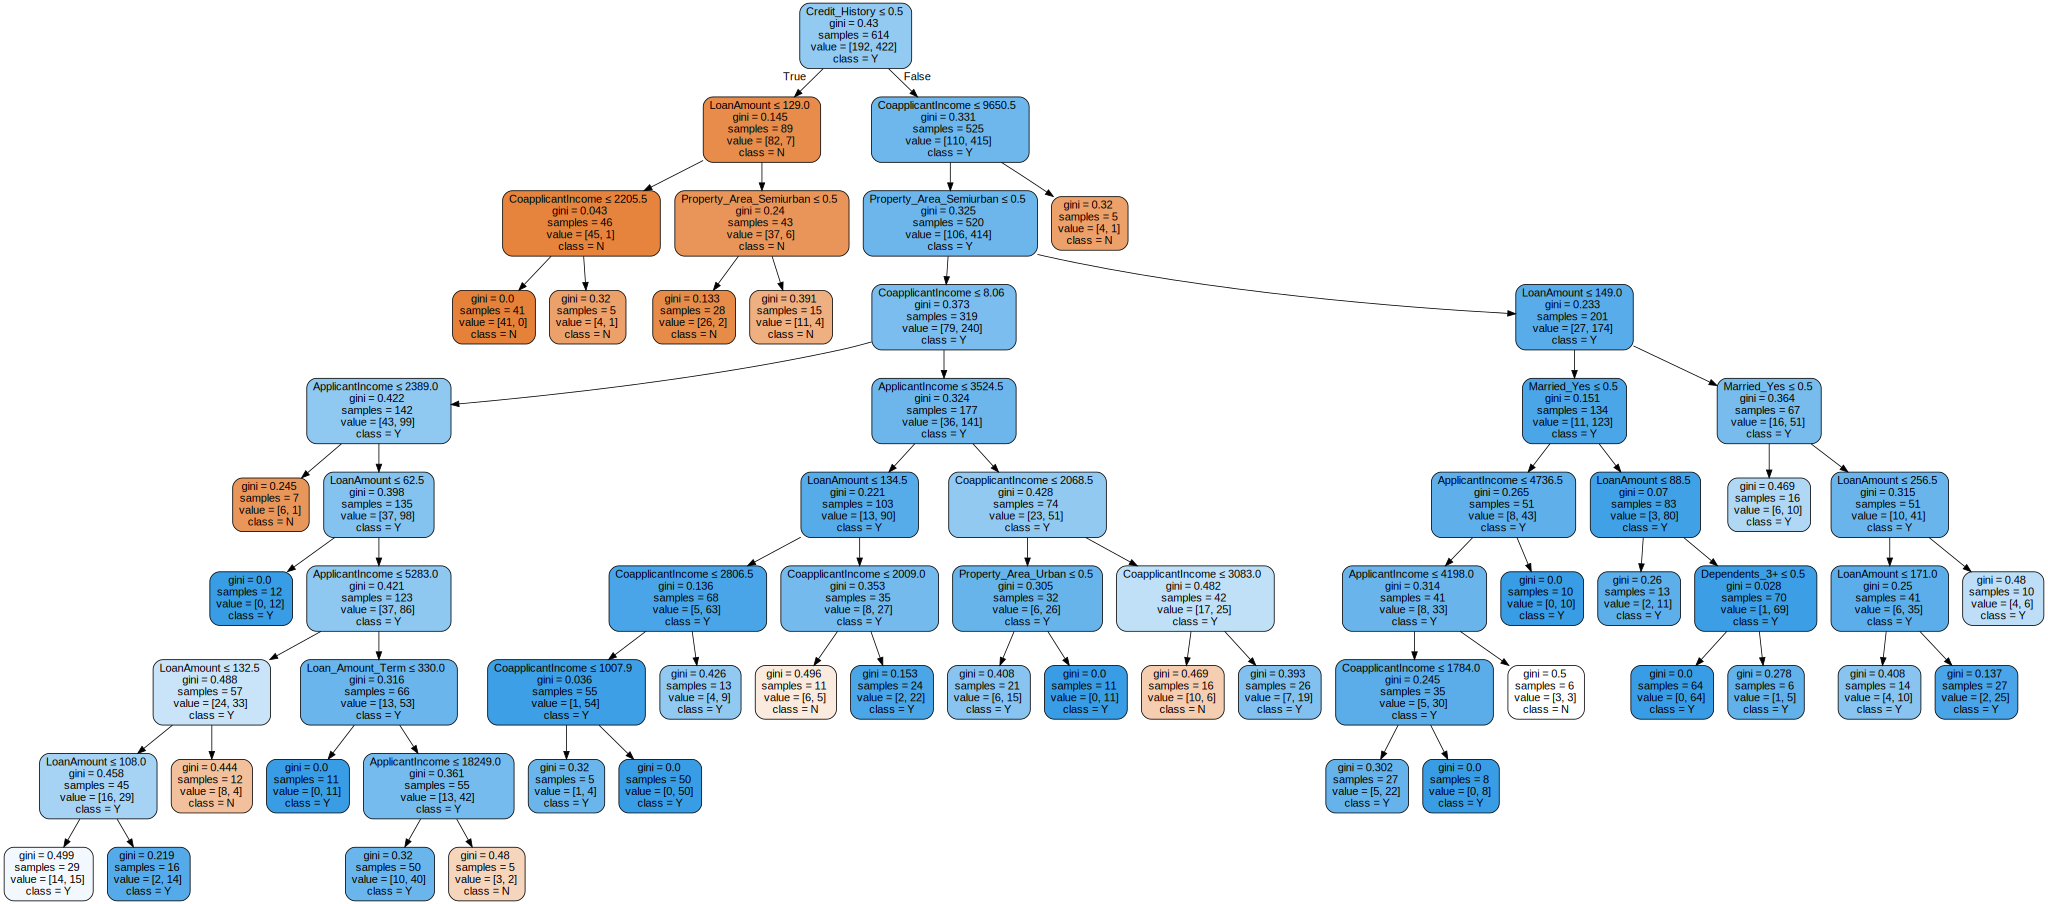

In [42]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['N','Y'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#  Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

depth_range = [3,4,5,6,7,8,9]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]
feature=np.arange(1,11,10)
estimator=[100,200,500]

parameters = dict(max_depth=depth_range,
                  min_samples_split=minsplit_range, 
                  min_samples_leaf=minleaf_range,
                 max_features=feature,
                  n_estimators=estimator)

In [44]:
clf_rand=RandomForestClassifier(random_state=2020)
ran_cv=GridSearchCV(clf_rand, param_grid=parameters,
                  cv=kfold,scoring='roc_auc')

ran_cv.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [45]:
print(ran_cv.best_params_)
print(ran_cv.best_score_)

{'max_depth': 6, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}
0.7719830685310562


In [46]:
y_pred_ran=ran_cv.predict(X_test)

In [47]:
clf_rand2=RandomForestClassifier(max_depth= 9, max_features= 1, 
                                 min_samples_leaf= 5, min_samples_split= 5, 
                                 n_estimators= 100)
clf_rand2.fit(X_train, y_train)
y_pred_ran2=clf_rand2.predict(X_test)

In [48]:
clf_rand3=RandomForestClassifier(max_depth= 9, max_features= 1, 
                                 min_samples_leaf= 5, min_samples_split= 5, 
                                 n_estimators= 100, random_state=2020)
clf_rand3.fit(X_train, y_train)
y_pred_ran3=clf_rand3.predict(X_test)

# Bagging Algo

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import BaggingClassifier



In [50]:
model_rf = BaggingClassifier(random_state=1211,oob_score=True,
                             max_features=X_train.shape[1],
                             n_estimators=50)

In [51]:
model_rf.fit( X_train , y_train )

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=14, max_samples=1.0, n_estimators=50,
                  n_jobs=None, oob_score=True, random_state=1211, verbose=0,
                  warm_start=False)

In [52]:
print("Out of Bag Score = " + "{:.4f}".format(model_rf.oob_score_))

y_pred_bag = model_rf.predict(X_test)

Out of Bag Score = 0.7622


In [53]:
y_pred_prob_bag = model_rf.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred_prob_bag)

1.0

In [54]:
model_rf2 = BaggingClassifier(base_estimator = LogisticRegression() ,
                             random_state=1211,oob_score=True,
                             max_features=X_train.shape[1],
                             n_estimators=50)
                             
model_rf2.fit(X_train, y_train)

C:\Users\dbda\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\dbda\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

C:\Users\dbda\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=14,
                  max_samples=1.0, n_estimators=50, n_jobs=None, oob_score=True,
                  random_state=1211, v

In [55]:
print("Out of Bag Score = " + "{:.4f}".format(model_rf2.oob_score_))

y_pred_bag_log = model_rf2.predict(X_test)

Out of Bag Score = 0.8111


In [56]:
y_pred_prob_bag2 = model_rf.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred_prob_bag2)

1.0

# Neural Network


In [74]:
from sklearn.neural_network import MLPClassifier

In [75]:
s=['lbfgs', 'sgd', 'adam']
m=[0.1, 0.33, 0.23, 0.45, 0.54, 0.23, 0.6, 0.8, 0.96, 0.76]
activation=['identity', 'logistic', 'tanh', 'relu']
lr_range = np.linspace(0.001,0.8,10)
hl_range = [(4,3,2),(3,2)]

In [79]:
parameters = dict(learning_rate_init=lr_range,hidden_layer_sizes = hl_range,
                  activation=activation, momentum=m)

In [80]:
mlp = MLPClassifier(random_state=2019,learning_rate='constant', max_iter=50)

kfold = StratifiedKFold(n_splits=5)

In [82]:
#mlpGrid = GridSearchCV(mlp, param_grid=parameters,cv=kfold,scoring='roc_auc')
#mlpGrid.fit(X_train,y_train)


In [62]:
#print("\nBest Parameters: ")
#print(mlpGrid.best_params_)

#print(mlpGrid.best_score_)

# Voting classifier 

In [84]:
from sklearn.ensemble import VotingClassifier

In [92]:
Voting = VotingClassifier(estimators=[('NB',clf_NB),
                                      ('LOG',clf_log),
                                      
                                     ('RAND', clf_rand)],voting='soft')

In [93]:
Voting.fit(X_train,y_train)
y_pred_vote = Voting.predict(X_test)

# submission

In [63]:
mysubmission=pd.read_csv(r"C:\Users\dbda\Desktop\Assessment\Loan\Sample_Submission_ZAuTl8O_FK3zQHh.csv")
mysubmission

,Loan_ID,Loan_Status


In [64]:
mysubmission["Loan_ID"]=test["Loan_ID"]
mysubmission["Loan_Status"]=y_pred_NB
mysubmission["Loan_Status"]=mysubmission["Loan_Status"].map({0:"N", 1:"Y"})
mysubmission.to_csv(r"C:\Users\dbda\Desktop\Assessment\median\loan_sub_NB1.csv", index=False)

In [69]:
mysubmission["Loan_Status"]=y_pred_log
mysubmission["Loan_Status"]=mysubmission["Loan_Status"].map({0:"N", 1:"Y"})
mysubmission.to_csv(r"C:\Users\dbda\Desktop\Assessment\median\loan_sub_log.csv", index=False)

In [66]:
mysubmission["Loan_Status"]=y_pred_ran
mysubmission["Loan_Status"]=mysubmission["Loan_Status"].map({0:"N", 1:"Y"})
mysubmission.to_csv(r"C:\Users\dbda\Desktop\Assessment\median\loan_sub_ran.csv", index=False)

In [70]:
mysubmission["Loan_Status"]=y_pred_bag
mysubmission["Loan_Status"]=mysubmission["Loan_Status"].map({0:"N", 1:"Y"})
mysubmission.to_csv(r"C:\Users\dbda\Desktop\Assessment\median\loan_sub_bag.csv", index=False)

In [71]:
mysubmission["Loan_Status"]=y_pred_bag_log
mysubmission["Loan_Status"]=mysubmission["Loan_Status"].map({0:"N", 1:"Y"})
mysubmission.to_csv(r"C:\Users\dbda\Desktop\Assessment\median\loan_sub_bag_log.csv", index=False)

In [72]:
mysubmission["Loan_Status"]=y_pred_ran2
mysubmission["Loan_Status"]=mysubmission["Loan_Status"].map({0:"N", 1:"Y"})
mysubmission.to_csv(r"C:\Users\dbda\Desktop\Assessment\median\loan_sub_ran2.csv", index=False)

In [73]:
mysubmission["Loan_Status"]=y_pred_ran3
mysubmission["Loan_Status"]=mysubmission["Loan_Status"].map({0:"N", 1:"Y"})
mysubmission.to_csv(r"C:\Users\dbda\Desktop\Assessment\median\loan_sub_ran3.csv", index=False)

In [88]:
mysubmission["Loan_Status"]=y_pred_vote
mysubmission["Loan_Status"]=mysubmission["Loan_Status"].map({0:"N", 1:"Y"})
mysubmission.to_csv(r"C:\Users\dbda\Desktop\Assessment\median\loan_sub_vote.csv", index=False)

In [91]:
mysubmission["Loan_Status"]=y_pred_vote
mysubmission["Loan_Status"]=mysubmission["Loan_Status"].map({0:"N", 1:"Y"})
mysubmission.to_csv(r"C:\Users\dbda\Desktop\Assessment\median\loan_sub_vote2.csv", index=False)

In [94]:
mysubmission["Loan_Status"]=y_pred_vote
mysubmission["Loan_Status"]=mysubmission["Loan_Status"].map({0:"N", 1:"Y"})
mysubmission.to_csv(r"C:\Users\dbda\Desktop\Assessment\median\loan_sub_vote3.csv", index=False)